<a href="https://colab.research.google.com/github/cagdas-aksoy7/DSA-210-Project/blob/main/miansource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import json
import pandas as pd

# downloading json data
with open('izleme geçmişi.json', 'r', encoding='utf-8') as file:
    youtube_data = json.load(file)

# extracting necessary informations
data = []
for item in youtube_data:
    if 'time' in item:
        data.append({
            'Date': item['time'],  # Tarih
            'Title': item.get('title', 'No Title'),  # Video başlığı
            'Channel': item.get('subtitles', [{'name': 'Unknown'}])[0]['name'] if 'subtitles' in item else 'Unknown'
        })

# converting to the dataframe
youtube_df = pd.DataFrame(data)

# converting date to datetime
youtube_df['Date'] = pd.to_datetime(youtube_df['Date'], format='ISO8601', errors='coerce')

# viewing first couple lines
print(youtube_df.head())


                              Date  \
0 2024-12-25 14:34:54.768000+00:00   
1 2024-12-25 12:09:29.587000+00:00   
2 2024-12-25 10:34:52.522000+00:00   
3 2024-12-25 10:34:10.927000+00:00   
4 2024-12-25 10:34:01.314000+00:00   

                                               Title         Channel  
0  Karadenizli Ja Morant, Tek Büyük Kural, En Hız...  Socrates Dergi  
1  E-Ticaret Yapanlar! Masada Para Bırakmayın 💸 |...     Kolay Değil  
2  Bir Kelime Hayatınızı Değiştirebilir! 👀 | Kısa...     Kolay Değil  
3  Chery’yi Sanayiye Götürüp Ustalara Gösterdik! ...     Doğan Kabak  
4  Kobe Bryant'ın Ardından... I Kaan Kural-İnan Ö...  Socrates Dergi  


In [35]:
import pandas as pd
import random

# exam period(2024 fall semester)
exam_start = pd.to_datetime('2024-11-10').date()
exam_end = pd.to_datetime('2024-11-17').date()


youtube_df['Date'] = pd.to_datetime(youtube_df['Date']).dt.date

# determining the exam and nonexam periods
youtube_df['Period'] = youtube_df['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam'
)

# Son 3 ay içinde sadece Non-Exam tarihlerden oluşan bir liste oluşturma
non_exam_dates = youtube_df[youtube_df['Period'] == 'Non-Exam']['Date'].unique()

#random date for non exam period
random_start_date = random.choice(non_exam_dates)
random_start_date = pd.to_datetime(random_start_date).date()

# Rastgele seçilen haftanın son tarihi
random_end_date = random_start_date + pd.Timedelta(days=6)

# Yeni "Adjusted Period" sütununu oluşturma
youtube_df['Adjusted Period'] = youtube_df['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else
              ('Non-Exam' if random_start_date <= x <= random_end_date else 'Exclude')
)

# Yeni dönemlere göre toplam video sayısını kontrol etme
print(youtube_df['Adjusted Period'].value_counts())

# Seçilen sınav dışı haftayı kontrol etme
print(f"Selected Non-Exam Week: {random_start_date} to {random_end_date}")

# Sadece "Exam" ve "Non-Exam" dönemlerini içeren verileri filtreleme
filtered_df = youtube_df[youtube_df['Adjusted Period'].isin(['Exam', 'Non-Exam'])]
print(filtered_df.head())


Adjusted Period
Exclude     25876
Non-Exam       75
Exam           73
Name: count, dtype: int64
Selected Non-Exam Week: 2023-10-24 to 2023-10-30
           Date                                              Title  \
884  2024-11-17  “Cem Yılmaz’a Gülmekten Cümle Kuramadık” | Fua...   
885  2024-11-17  Jordan Peterson - Why it's so Hard to Sit Down...   
886  2024-11-17  Pointer to Structure || Abdul Bari adlı videoy...   
887  2024-11-17  2.6.1 Binary Search Iterative Method adlı vide...   
888  2024-11-17       CS50 / Week 0: Friday adlı videoyu izlediniz   

                     Channel Period Adjusted Period  
884           Socrates Dergi   Exam            Exam  
885    Bite-sized Philosophy   Exam            Exam  
886  k180128 Shaheer Mehmood   Exam            Exam  
887               Abdul Bari   Exam            Exam  
888       Harvard University   Exam            Exam  


<ipython-input-36-7f2daa11feb3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_videos['Day'] = range(1, len(exam_videos) + 1)
<ipython-input-36-7f2daa11feb3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_exam_videos['Day'] = range(1, len(non_exam_videos) + 1)


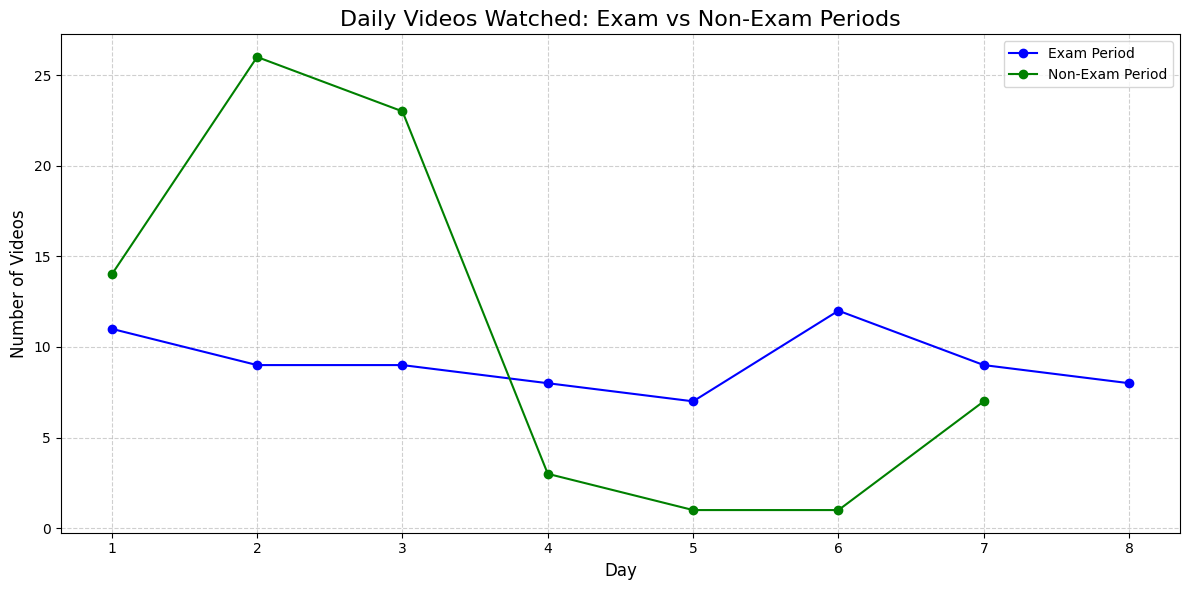

In [36]:
import matplotlib.pyplot as plt

# Exam ve Non-Exam dönemlerini içeren verileri filtreleme
filtered_df = youtube_df[youtube_df['Adjusted Period'].isin(['Exam', 'Non-Exam'])]

# Günlük video sayısını hesaplama
daily_video_counts = filtered_df.groupby(['Date', 'Adjusted Period']).size().reset_index(name='Video_Count')

# Sadece sınav ve sınav dışı dönemleri karşılaştırma
exam_videos = daily_video_counts[daily_video_counts['Adjusted Period'] == 'Exam']
non_exam_videos = daily_video_counts[daily_video_counts['Adjusted Period'] == 'Non-Exam']

# Tarih bilgisi yerine gün numarası eklemek için bir dizin oluşturma
exam_videos['Day'] = range(1, len(exam_videos) + 1)
non_exam_videos['Day'] = range(1, len(non_exam_videos) + 1)

# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.plot(exam_videos['Day'], exam_videos['Video_Count'], marker='o', linestyle='-', color='blue', label='Exam Period')
plt.plot(non_exam_videos['Day'], non_exam_videos['Video_Count'], marker='o', linestyle='-', color='green', label='Non-Exam Period')
plt.title('Daily Videos Watched: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Day', fontsize=12)  # Gün numarası ekseni
plt.ylabel('Number of Videos', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



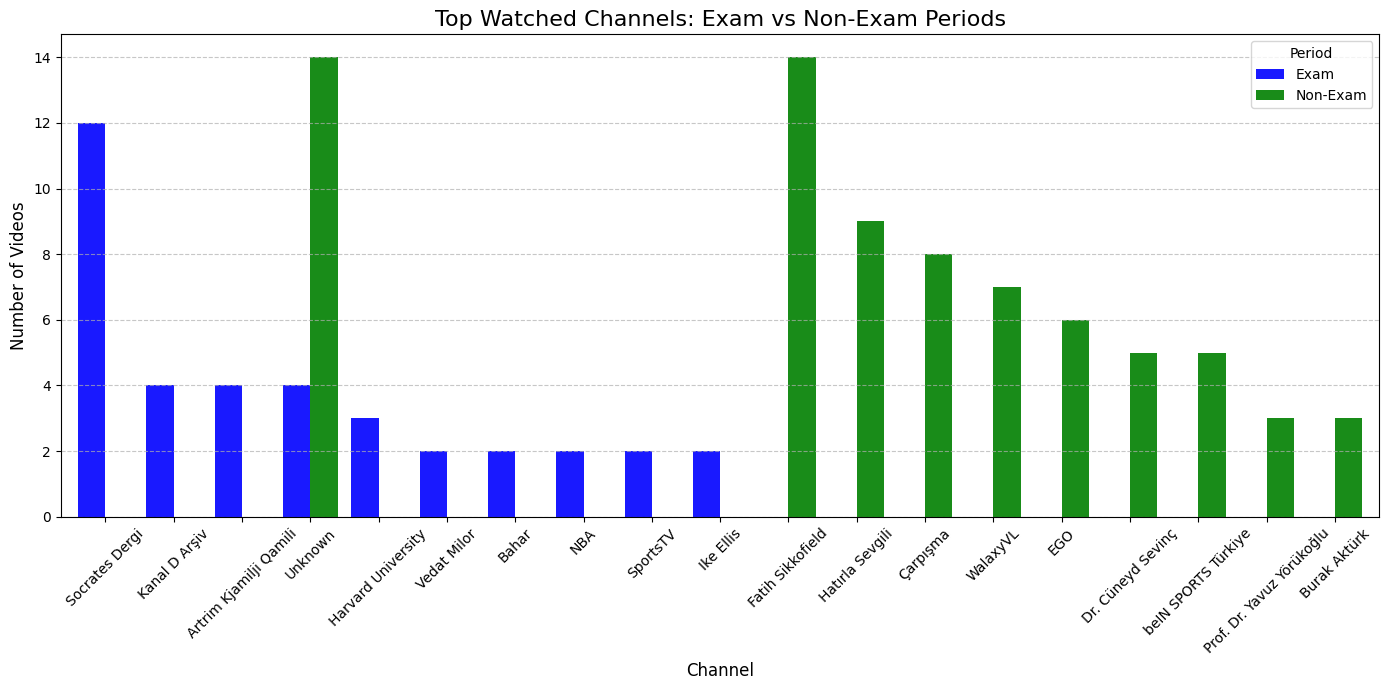

In [37]:
# Birleştirilmiş kanal verisi
top_channels = pd.concat([exam_channels, non_exam_channels], axis=1, keys=['Exam', 'Non-Exam']).fillna(0)

# Grupları yan yana çubuk grafikle görselleştirme
top_channels.plot(kind='bar', figsize=(14, 7), width=0.8, alpha=0.9, color=['blue', 'green'])
plt.title('Top Watched Channels: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Number of Videos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Period')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


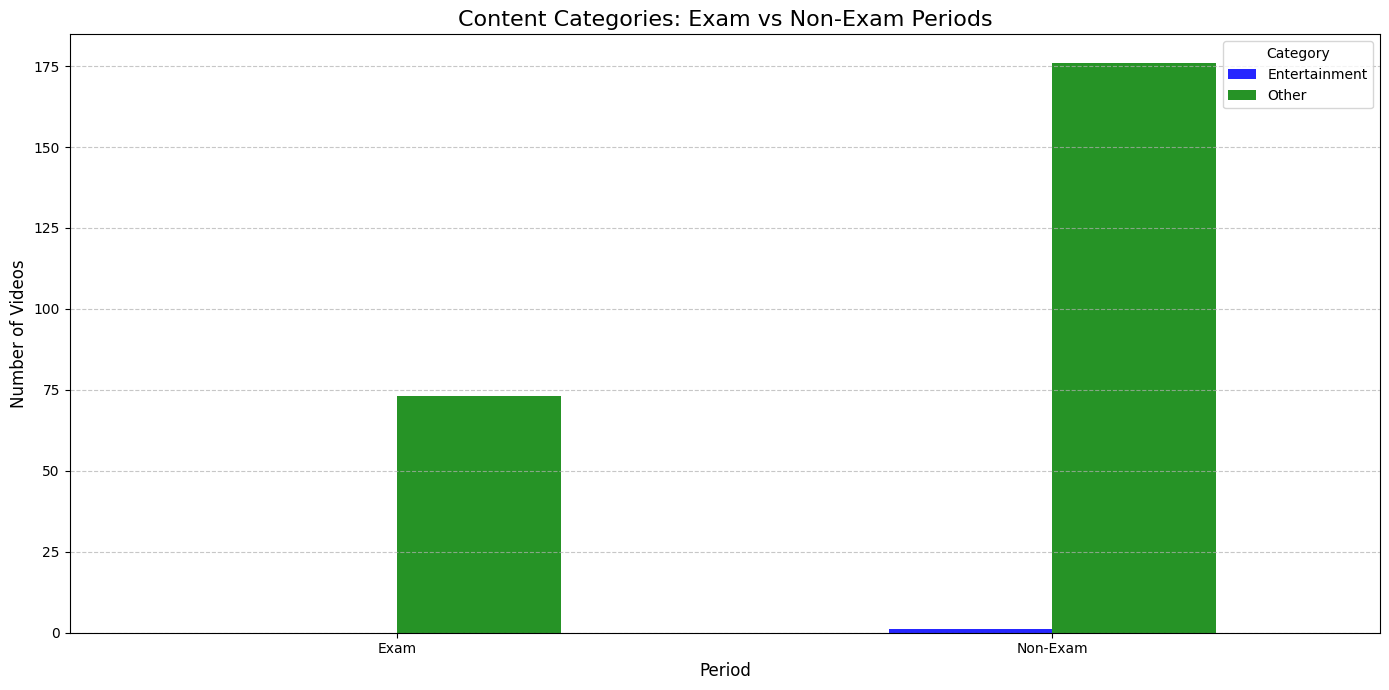

In [38]:
# İçerik kategorilerini karşılaştırma
category_counts.plot(kind='bar', figsize=(14, 7), alpha=0.85, color=['blue', 'green'])
plt.title('Content Categories: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Number of Videos', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


heatmap

In [42]:

# İçerik kategorilerini pivot tabloya dönüştürme
category_heatmap_data = filtered_df.groupby(['Adjusted Period', 'Category']).size().unstack(fill_value=0)

# Heatmap oluşturma
plt.figure(figsize=(10, 6))
sns.heatmap(category_heatmap_data, cmap='coolwarm', annot=True, fmt="d", linewidths=.5)
plt.title('Content Category Heatmap: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Period', fontsize=12)
plt.tight_layout()
plt.show()


KeyError: 'Category'

<ipython-input-44-7303ca50d3d5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Adjusted Period', y='Video_Count', data=boxplot_data_youtube, palette='coolwarm')


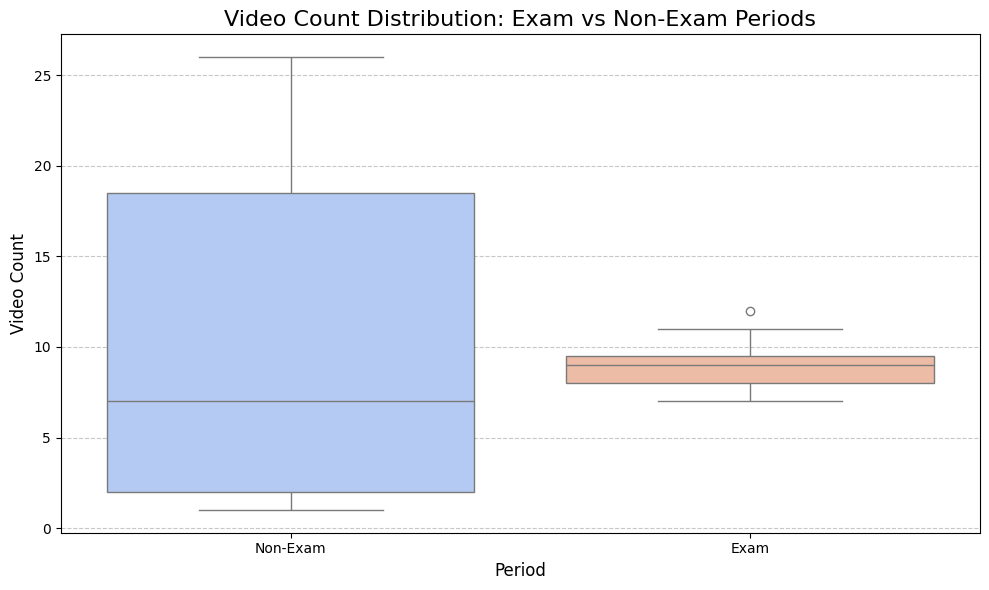

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Günlük video sayısını hesaplama ve sınav/non-exam dönemleriyle birleştirme
boxplot_data_youtube = daily_video_counts[daily_video_counts['Adjusted Period'].isin(['Exam', 'Non-Exam'])]

# Box plot oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(x='Adjusted Period', y='Video_Count', data=boxplot_data_youtube, palette='coolwarm')
plt.title('Video Count Distribution: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Video Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


APPLE health verisine geçiyorum




In [30]:
import xml.etree.ElementTree as ET
import pandas as pd

# XML dosyasını yükle
tree = ET.parse('export.xml')
root = tree.getroot()

# Sadece adım sayısı (Step Count) kayıtlarını al
step_data = []
for record in root.findall('Record'):
    if record.attrib.get('type') == 'HKQuantityTypeIdentifierStepCount':  # Adım sayısı verisi
        step_data.append({
            'Date': record.attrib['startDate'][:10],  # Tarih (sadece yyyy-mm-dd kısmı)
            'Steps': float(record.attrib['value'])  # Adım sayısı
        })

# DataFrame'e dönüştür
steps_df = pd.DataFrame(step_data)

# Tarih sütununu datetime formatına çevir
steps_df['Date'] = pd.to_datetime(steps_df['Date'])

# Günlük toplam adım sayısını hesapla
daily_steps = steps_df.groupby('Date')['Steps'].sum().reset_index()

# İlk birkaç satırı kontrol et
print(daily_steps.head())


        Date   Steps
0 2016-11-08   222.0
1 2016-11-09  3944.0
2 2016-11-10  6722.0
3 2016-11-11  5025.0
4 2016-11-12  4636.0


In [31]:
import random

# Sınav haftası aralığı
exam_start = pd.to_datetime('2024-11-10')
exam_end = pd.to_datetime('2024-11-17')

# Son 3 ayın başlangıç tarihi
three_months_ago = daily_steps['Date'].max() - pd.Timedelta(days=90)

# Sadece son 3 aya ait verileri filtrele
daily_steps_last_3_months = daily_steps[daily_steps['Date'] >= three_months_ago]

# Rastgele bir sınav dışı haftayı seçme (Sınav haftasına denk gelmeyen tarihler)
non_exam_dates = daily_steps_last_3_months[
    (daily_steps_last_3_months['Date'] < exam_start) | (daily_steps_last_3_months['Date'] > exam_end)
]['Date'].unique()

random_start_date = random.choice(non_exam_dates)
random_start_date = pd.to_datetime(random_start_date)

# Rastgele seçilen haftanın son tarihi
random_end_date = random_start_date + pd.Timedelta(days=6)

# Yeni dönemleri belirleme
daily_steps['Period'] = daily_steps['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else
              ('Non-Exam' if random_start_date <= x <= random_end_date else 'Exclude')
)

# Yeni dönemlere göre veri sayısını kontrol etme
print(daily_steps['Period'].value_counts())

# Rastgele seçilen sınav dışı haftayı kontrol etme
print(f"Selected Non-Exam Week: {random_start_date.date()} to {random_end_date.date()}")


Period
Exclude     2881
Exam           8
Non-Exam       5
Name: count, dtype: int64
Selected Non-Exam Week: 2024-12-19 to 2024-12-25


günlük adım sayısını görselleştirme

<ipython-input-13-616ad57e0bd0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_steps['Day'] = range(1, len(exam_steps) + 1)
<ipython-input-13-616ad57e0bd0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_exam_steps['Day'] = range(1, len(non_exam_steps) + 1)


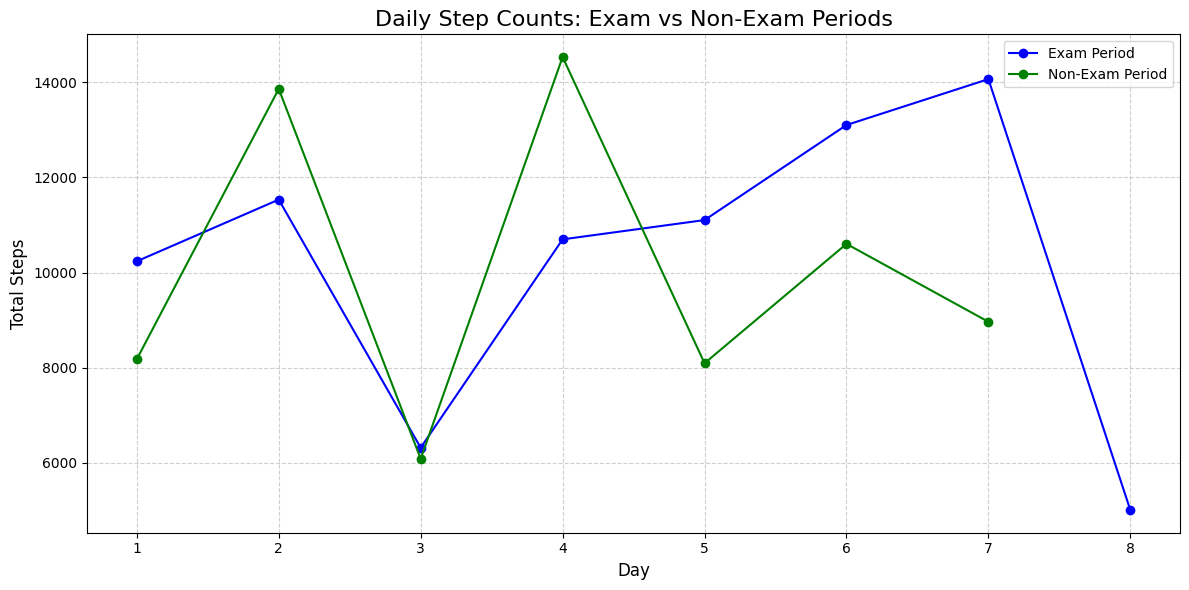

In [13]:
import matplotlib.pyplot as plt

# Sadece Exam ve Non-Exam dönemlerini içeren veriler
filtered_steps = daily_steps[daily_steps['Period'].isin(['Exam', 'Non-Exam'])]

# Exam ve Non-Exam verilerini ayırma
exam_steps = filtered_steps[filtered_steps['Period'] == 'Exam']
non_exam_steps = filtered_steps[filtered_steps['Period'] == 'Non-Exam']

# Tarih eksenini temizlemek için gün numarası ekleyelim
exam_steps['Day'] = range(1, len(exam_steps) + 1)
non_exam_steps['Day'] = range(1, len(non_exam_steps) + 1)

# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.plot(exam_steps['Day'], exam_steps['Steps'], marker='o', linestyle='-', color='blue', label='Exam Period')
plt.plot(non_exam_steps['Day'], non_exam_steps['Steps'], marker='o', linestyle='-', color='green', label='Non-Exam Period')
plt.title('Daily Step Counts: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Day', fontsize=12)  # Gün numarası ekseni
plt.ylabel('Total Steps', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [14]:
# Her iki DataFrame'deki 'Date' sütunlarını datetime formatına çevir
filtered_steps['Date'] = pd.to_datetime(filtered_steps['Date'])
daily_video_counts['Date'] = pd.to_datetime(daily_video_counts['Date'])

# Günlük adım sayıları ve YouTube video sayısını birleştirme
daily_data = filtered_steps.merge(
    daily_video_counts, on='Date', how='inner'
)  # Adım ve video verisini birleştirme

# Descriptive statistics for Exam and Non-Exam periods
exam_stats = filtered_steps[filtered_steps['Period'] == 'Exam']['Steps'].describe()
non_exam_stats = filtered_steps[filtered_steps['Period'] == 'Non-Exam']['Steps'].describe()

print("Exam Period Statistics:\n", exam_stats)
print("\nNon-Exam Period Statistics:\n", non_exam_stats)

# Daily YouTube video counts ile adım sayıları arasındaki korelasyon
correlation = daily_data[['Video_Count', 'Steps']].corr()
print("\nCorrelation between Video Count and Steps:\n", correlation)


Exam Period Statistics:
 count        8.000000
mean     10256.625000
std       3118.723958
min       5011.000000
25%       9257.000000
50%      10898.500000
75%      11922.500000
max      14061.000000
Name: Steps, dtype: float64

Non-Exam Period Statistics:
 count        7.000000
mean     10044.142857
std       3136.585268
min       6087.000000
25%       8137.000000
50%       8965.000000
75%      12228.500000
max      14526.000000
Name: Steps, dtype: float64

Correlation between Video Count and Steps:
              Video_Count     Steps
Video_Count     1.000000  0.323512
Steps           0.323512  1.000000


<ipython-input-14-3f9775291b46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_steps['Date'] = pd.to_datetime(filtered_steps['Date'])


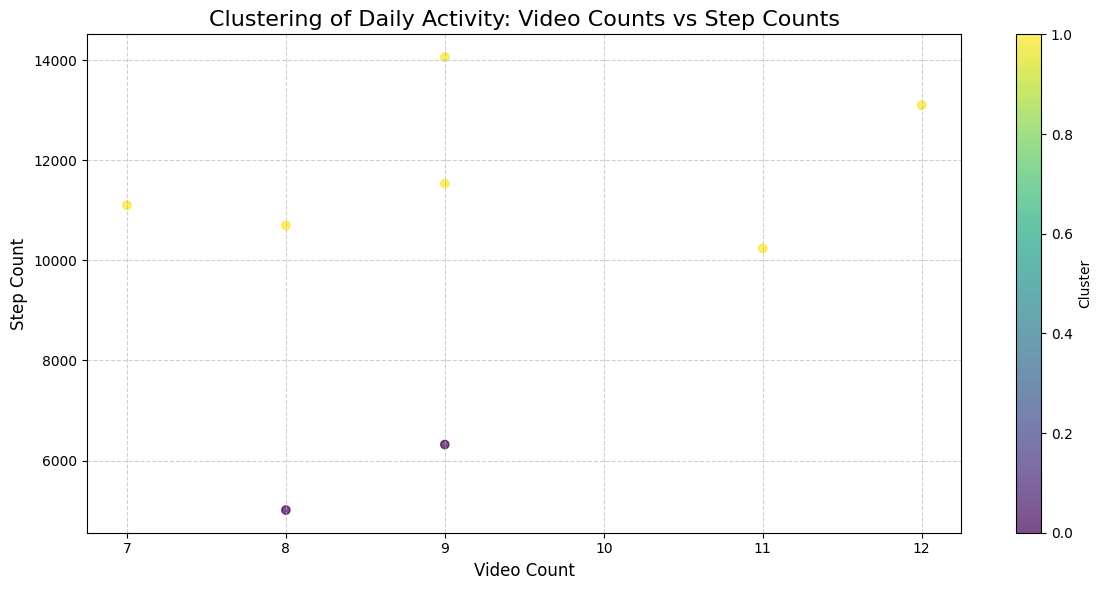

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Günlük video sayısı ve adım sayısını kullanarak bir veri çerçevesi oluştur
clustering_data = daily_data[['Video_Count', 'Steps']].dropna()

# K-Means modeli (2 cluster ile)
kmeans = KMeans(n_clusters=2, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)

# Grupları görselleştirme
plt.figure(figsize=(12, 6))
plt.scatter(
    clustering_data['Video_Count'], clustering_data['Steps'],
    c=clustering_data['Cluster'], cmap='viridis', alpha=0.7
)
plt.title('Clustering of Daily Activity: Video Counts vs Step Counts', fontsize=16)
plt.xlabel('Video Count', fontsize=12)
plt.ylabel('Step Count', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Linear Regression Results:
Mean Squared Error: 6059129.461734688
R-squared: -8.88295249422953


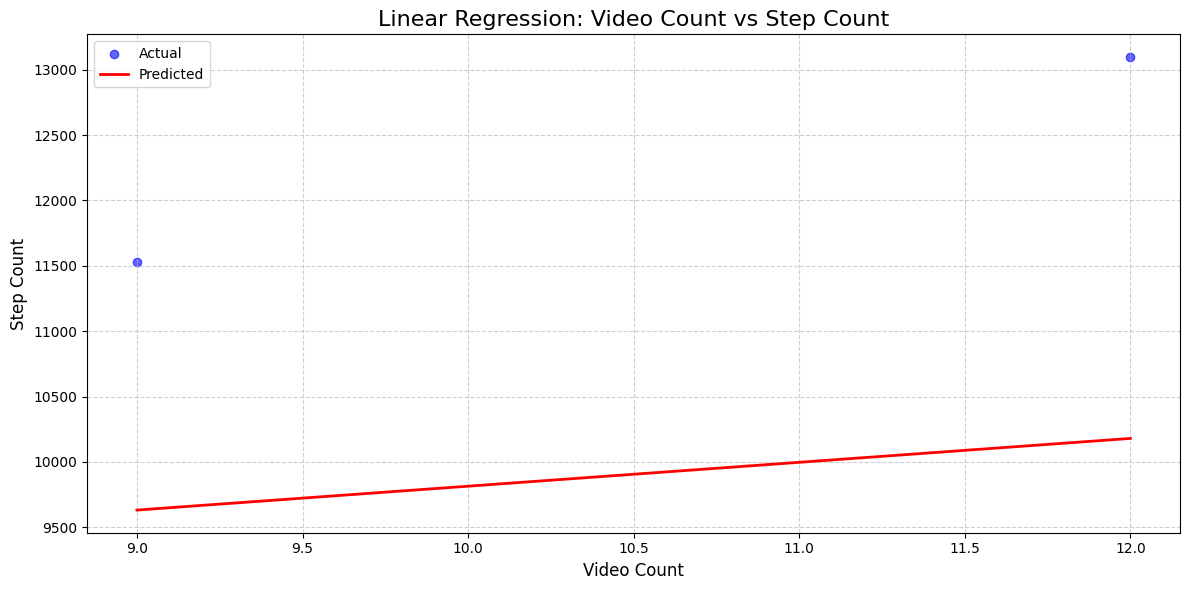

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Veri hazırlığı
X = clustering_data[['Video_Count']]  # Bağımsız değişken
y = clustering_data['Steps']  # Bağımlı değişken

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin ve performans değerlendirme
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Görselleştirme
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Video Count vs Step Count', fontsize=16)
plt.xlabel('Video Count', fontsize=12)
plt.ylabel('Step Count', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


HYpothesis Testing

In [22]:
import pandas as pd
from scipy.stats import ttest_ind

# Sınav dönemi tarihleri
exam_start = pd.to_datetime('2024-11-10')
exam_end = pd.to_datetime('2024-11-17')

# Non-Exam dönemi sınav dönemi dışında kalan tüm son 3 ayı kapsayacak şekilde yeniden tanımla
three_months_ago = daily_steps['Date'].max() - pd.Timedelta(days=90)

daily_steps['Period'] = daily_steps['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else
              ('Non-Exam' if x >= three_months_ago else 'Exclude')
)

# Dönemlere göre veri sayısını kontrol et
print(daily_steps['Period'].value_counts())

# Sınav ve sınav dışı dönemlerdeki tarihleri kontrol et
exam_dates = daily_steps[daily_steps['Period'] == 'Exam']['Date']
non_exam_dates = daily_steps[daily_steps['Period'] == 'Non-Exam']['Date']

print("Exam Period Dates:", list(exam_dates))
print("Non-Exam Period Dates:", list(non_exam_dates))


Period
Exclude     2803
Non-Exam      83
Exam           8
Name: count, dtype: int64
Exam Period Dates: [Timestamp('2024-11-10 00:00:00'), Timestamp('2024-11-11 00:00:00'), Timestamp('2024-11-12 00:00:00'), Timestamp('2024-11-13 00:00:00'), Timestamp('2024-11-14 00:00:00'), Timestamp('2024-11-15 00:00:00'), Timestamp('2024-11-16 00:00:00'), Timestamp('2024-11-17 00:00:00')]
Non-Exam Period Dates: [Timestamp('2024-09-24 00:00:00'), Timestamp('2024-09-25 00:00:00'), Timestamp('2024-09-26 00:00:00'), Timestamp('2024-09-27 00:00:00'), Timestamp('2024-09-28 00:00:00'), Timestamp('2024-09-29 00:00:00'), Timestamp('2024-09-30 00:00:00'), Timestamp('2024-10-01 00:00:00'), Timestamp('2024-10-02 00:00:00'), Timestamp('2024-10-03 00:00:00'), Timestamp('2024-10-04 00:00:00'), Timestamp('2024-10-05 00:00:00'), Timestamp('2024-10-06 00:00:00'), Timestamp('2024-10-07 00:00:00'), Timestamp('2024-10-08 00:00:00'), Timestamp('2024-10-09 00:00:00'), Timestamp('2024-10-10 00:00:00'), Timestamp('2024-10-11 

In [23]:
# Sınav ve sınav dışı dönemler için günlük adım sayıları
exam_steps = daily_steps[daily_steps['Period'] == 'Exam']['Steps']
non_exam_steps = daily_steps[daily_steps['Period'] == 'Non-Exam']['Steps']

# Eksik değerleri kontrol ve temizleme
print("Exam Steps NaNs:", exam_steps.isna().sum())
print("Non-Exam Steps NaNs:", non_exam_steps.isna().sum())

exam_steps = exam_steps.dropna()
non_exam_steps = non_exam_steps.dropna()

# Temizlenmiş veri uzunluklarını kontrol et
print("Exam Steps Count:", len(exam_steps))
print("Non-Exam Steps Count:", len(non_exam_steps))


Exam Steps NaNs: 0
Non-Exam Steps NaNs: 0
Exam Steps Count: 8
Non-Exam Steps Count: 83


In [24]:
# Tek yönlü t-testi (greater)
t_stat, p_value = ttest_ind(exam_steps, non_exam_steps, alternative='less')

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Sonuçları yorumlama
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Sınav döneminde günlük adım sayısı azalıyor.")
else:
    print("Fail to reject the null hypothesis: Sınav döneminde günlük adım sayısı azalıyor hipotezi desteklenmiyor.")


T-Statistic: 0.13022092006273045
P-Value: 0.55165723974572
Fail to reject the null hypothesis: Sınav döneminde günlük adım sayısı azalıyor hipotezi desteklenmiyor.


textual data analysis

In [25]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Stopwords indir
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Başlıkları birleştir
all_titles = " ".join(filtered_df['Title'])

# Tokenize et ve küçük harfe çevir
tokens = [word.lower() for word in all_titles.split() if word.lower() not in stop_words]

# Kelime frekansını hesapla
word_freq = Counter(tokens)

# En sık geçen kelimeleri al
most_common_words = word_freq.most_common(10)
print("Most Common Words in Titles:", most_common_words)


Most Common Words in Titles: [('adlı', 250), ('videoyu', 250), ('izlediniz', 250), ('-', 66), ('|', 63), ('bölüm', 34), ('#shorts', 21), ('&', 14), ('ameliyatı', 12), ('testis', 11)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


sentiment analysis


In [26]:
from textblob import TextBlob

# Her başlık için duygu puanı hesapla
filtered_df['Sentiment'] = filtered_df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sınav ve sınav dışı dönemlerdeki ortalama duygu puanını karşılaştır
exam_sentiment = filtered_df[filtered_df['Adjusted Period'] == 'Exam']['Sentiment'].mean()
non_exam_sentiment = filtered_df[filtered_df['Adjusted Period'] == 'Non-Exam']['Sentiment'].mean()

print("Average Sentiment during Exam Period:", exam_sentiment)
print("Average Sentiment during Non-Exam Period:", non_exam_sentiment)


Average Sentiment during Exam Period: 0.0732496194824962
Average Sentiment during Non-Exam Period: 0.011758474576271185


<ipython-input-26-8d9d54041941>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sentiment'] = filtered_df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)


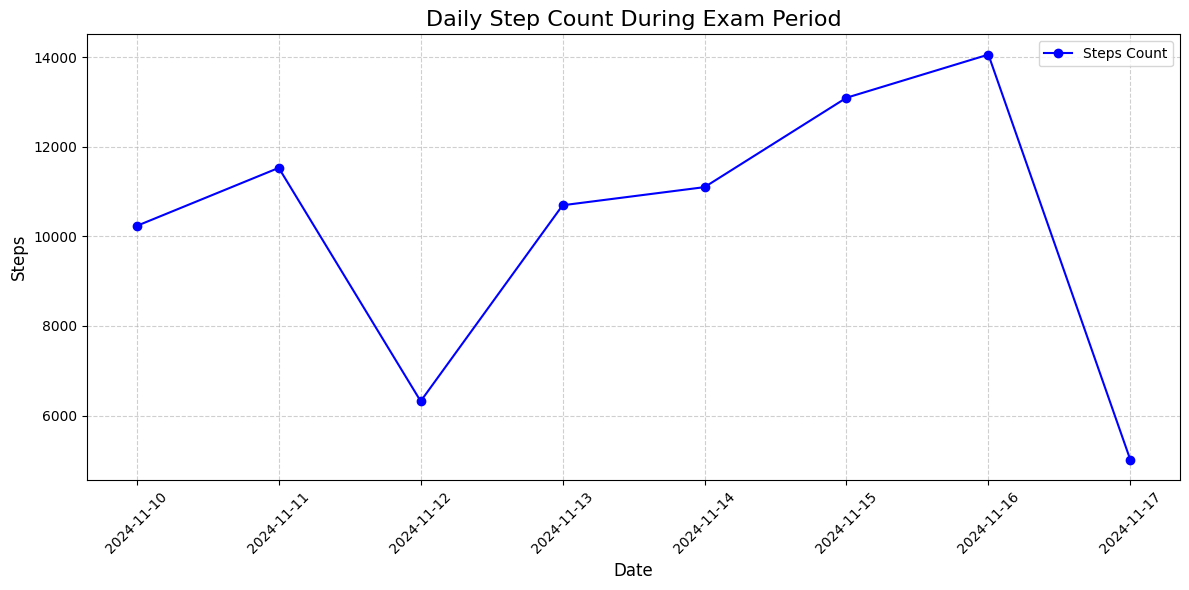

In [32]:
import matplotlib.pyplot as plt

# Sınav haftasını filtreleme
exam_steps = daily_steps[daily_steps['Period'] == 'Exam']

# Günlük trendlerin görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.plot(exam_steps['Date'], exam_steps['Steps'], marker='o', linestyle='-', color='blue', label='Steps Count')
plt.title('Daily Step Count During Exam Period', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Steps', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


heatmap

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Günlük toplam adım sayısı ve video izleme sayısını birleştirme
daily_data = daily_steps.merge(daily_video_counts, on='Date', how='inner')
heatmap_data = daily_data.pivot('Date', 'Adjusted Period', 'Steps')

# Heatmap oluşturma
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title('Daily Step Count Heatmap: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: You are trying to merge on datetime64[ns] and object columns for key 'Date'. If you wish to proceed you should use pd.concat

<ipython-input-43-3fb5d15a265a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Period', y='Steps', data=boxplot_data, palette='coolwarm')


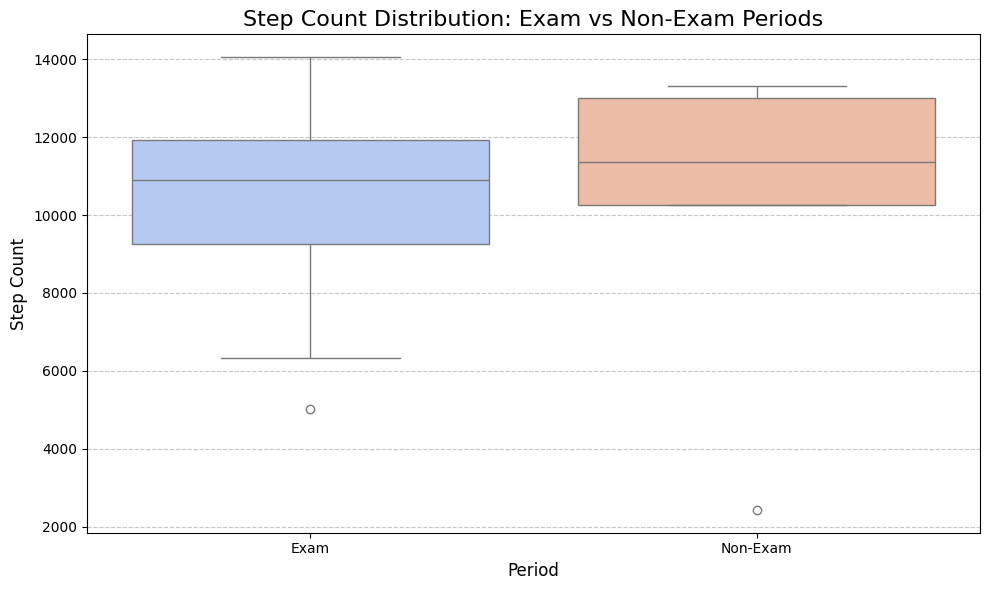

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sınav ve sınav dışı döneme göre adım sayısı verisini filtreleme
boxplot_data = daily_steps[daily_steps['Period'].isin(['Exam', 'Non-Exam'])]

# Box plot oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='Steps', data=boxplot_data, palette='coolwarm')
plt.title('Step Count Distribution: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Step Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


correlation between step and youtube



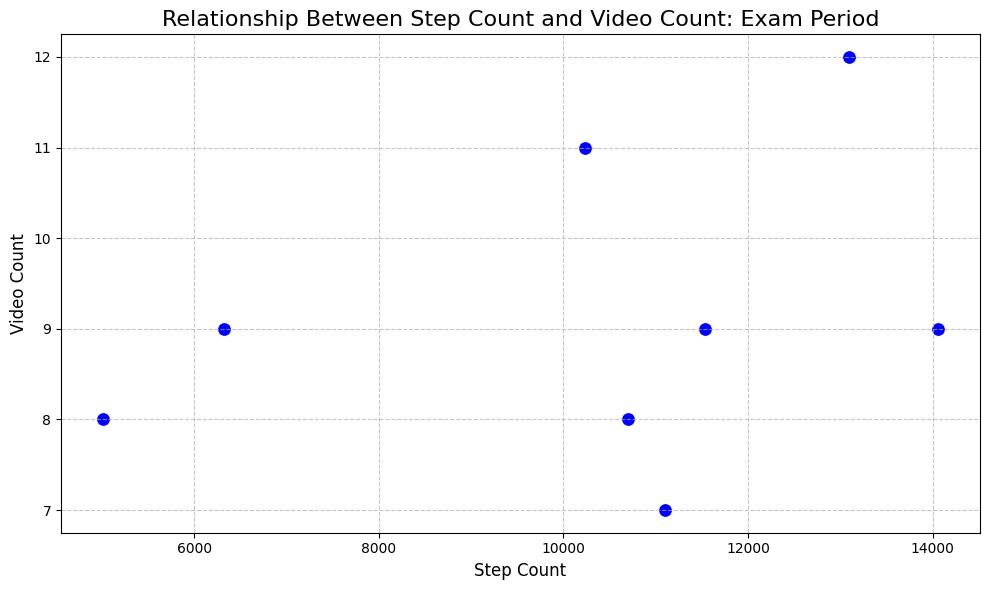

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece Exam Period verisi
exam_data = daily_data[daily_data['Adjusted Period'] == 'Exam']

# Scatter Plot: Exam Period
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Steps', y='Video_Count', data=exam_data, color='blue', s=100)
plt.title('Relationship Between Step Count and Video Count: Exam Period', fontsize=16)
plt.xlabel('Step Count', fontsize=12)
plt.ylabel('Video Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
